In [1]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from flask import Flask, jsonify
from pprint import pprint

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)
#inspector

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.

In [13]:
#inspector.get_table_names()
columns = inspector.get_columns('measurement')
columns

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [45]:
datesdf = pd.DataFrame(session.query(measurement.date).all())
datesdf['date'] = datesdf['date'].astype('datetime64[ns]')
datesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    19550 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 152.9 KB


In [49]:
# Starting from the most recent data point in the database. 
last = datesdf.date.max()
last20 = last.date()
print(last20)

2017-08-23


In [37]:
#another method of finding the last date
last2 = session.query(func.max(measurement.date)).scalar()
print(last2)

2017-08-23


In [86]:
py = last20 - dt.timedelta(days=365)
py_date = py.strftime('%Y-%m-%d')
results = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= py_date).all()
results
# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(results, columns=['date','precipitation'])
df1.set_index('date', inplace=True)
df1 = df1.sort_index()
df1.head()


,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
py = last20 - dt.timedelta(days=365)
py_date = py.strftime('%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= py_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df1 = pd.DataFrame(results, columns=['date','precipitation'])
df1.set_index('date', inplace=True)


# df1.head()

# Sort the dataframe by date
df1 = df1.sort_index()






In [124]:
#auto generate ticks
i = 10
n = int(365/i)
ticks = [date.strftime('%Y-%m-%d') for date in [last20 - dt.timedelta(days=n*d) for d in range(i)]]
ticks

['2017-08-23',
 '2017-07-18',
 '2017-06-12',
 '2017-05-07',
 '2017-04-01',
 '2017-02-24',
 '2017-01-19',
 '2016-12-14',
 '2016-11-08',
 '2016-10-03']

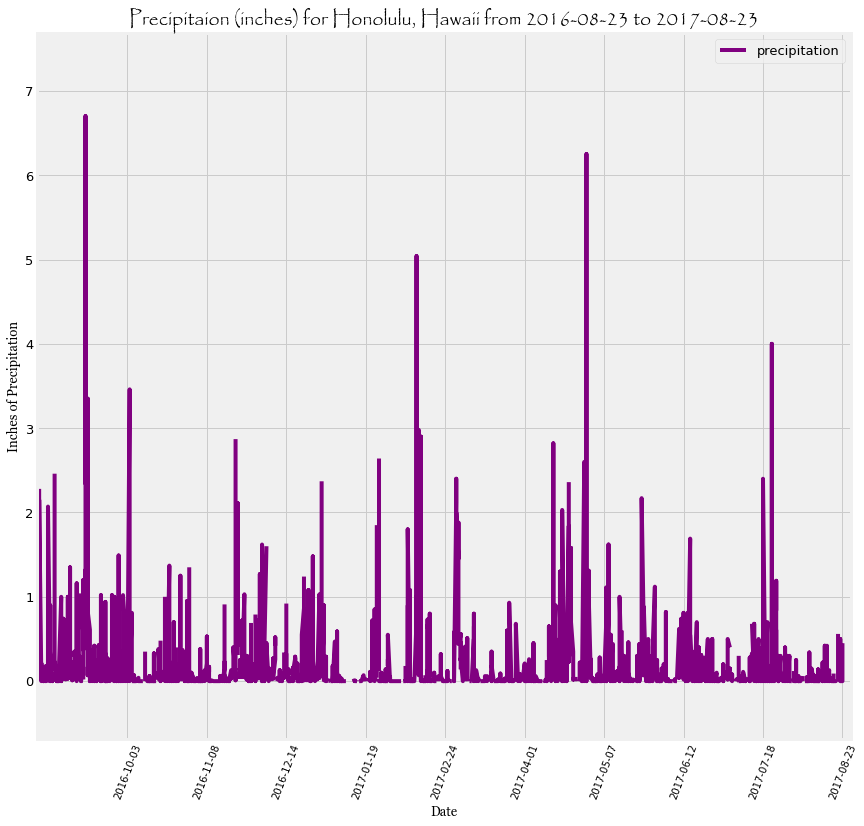

In [123]:
# Use Pandas Plotting with Matplotlib to plot the data

fig1, ax1 = plt.subplots(figsize=(13, 13))
i = 10
n = int(365/i)
ticks = [date.strftime('%Y-%m-%d') for date in [last20 - dt.timedelta(days=n*d) for d in range(i)]]
x = df1.index
y = df1['precipitation']
plt.plot(x, y, color = 'purple')
plt.xticks(ticks, rotation=69)
plt.yticks(size = 13)
plt.ylabel("Inches of Precipitation",font='Georgia',fontsize=13)
plt.xlabel("Date",font='Georgia',fontsize=13)
plt.title(f"Precipitaion (inches) for Honolulu, Hawaii from {py_date} to {last20}",font='Papyrus',fontsize=19.69)
plt.legend(['precipitation'], loc="upper right",fontsize=13)

plt.xlim(0,369)
plt.ylim(-.69,7.69)

plt.savefig("./Images/HonoluluPrecipitaion.png")

plt.show()


In [126]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df1.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [131]:
columns2 = inspector.get_columns('station')
df3 = pd.DataFrame(columns2)
df3

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [132]:
# Design a query to calculate the total number stations in the dataset
session.query(station.id).count()

9

In [144]:
sdf = pd.DataFrame(session.query(station).all())
sdf



,0
0,<sqlalchemy.ext.automap.station object at 0x00...
1,<sqlalchemy.ext.automap.station object at 0x00...
2,<sqlalchemy.ext.automap.station object at 0x00...
3,<sqlalchemy.ext.automap.station object at 0x00...
4,<sqlalchemy.ext.automap.station object at 0x00...
5,<sqlalchemy.ext.automap.station object at 0x00...
6,<sqlalchemy.ext.automap.station object at 0x00...
7,<sqlalchemy.ext.automap.station object at 0x00...
8,<sqlalchemy.ext.automap.station object at 0x00...


In [145]:
for class_instance in session.query(station).all():
    print(vars(class_instance))

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001B26F3E7850>, 'longitude': -157.8168, 'name': 'WAIKIKI 717.2, HI US', 'id': 1, 'elevation': 3.0, 'station': 'USC00519397', 'latitude': 21.2716}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001B26FF43940>, 'longitude': -157.8015, 'name': 'KANEOHE 838.1, HI US', 'id': 2, 'elevation': 14.6, 'station': 'USC00513117', 'latitude': 21.4234}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001B26FF433A0>, 'longitude': -157.8374, 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'id': 3, 'elevation': 7.0, 'station': 'USC00514830', 'latitude': 21.5213}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001B26FF43FD0>, 'longitude': -157.9751, 'name': 'PEARL CITY, HI US', 'id': 4, 'elevation': 11.9, 'station': 'USC00517948', 'latitude': 21.3934}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000001B26FF431C0>, 'longitude': 

In [135]:
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [146]:
session.query(station).all()

In [175]:
sel = [station.station, station.name, func.count(measurement.station)]
s = session.query(*sel).filter(station.station == measurement.station).group_by(station.station).order_by(func.count(measurement.station).desc()).all()
sdf = pd.DataFrame(s, columns=['station','name','count'])
sdf

'USC00519281'

In [196]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [station.station, station.name, func.count(measurement.station)]
s = session.query(*sel).filter(station.station == measurement.station).group_by(station.station).order_by(func.count(measurement.station).desc()).all()
sdf = pd.DataFrame(s, columns=['station','name','count'])
sdf.set_index('station',inplace=True)
sdf

,name,count
station,,
USC00519281,"WAIHEE 837.5, HI US",2772
USC00519397,"WAIKIKI 717.2, HI US",2724
USC00513117,"KANEOHE 838.1, HI US",2709
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
USC00517948,"PEARL CITY, HI US",1372
USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [201]:
sdf.index[0]

'USC00519281'

In [198]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == sdf.index[0]).all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [206]:
results1 = session.query(measurement.tobs).\
        filter(measurement.date.between(py_date,last20), measurement.station == sdf.index[0]).all()
df2 = pd.DataFrame(results1)
df2.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


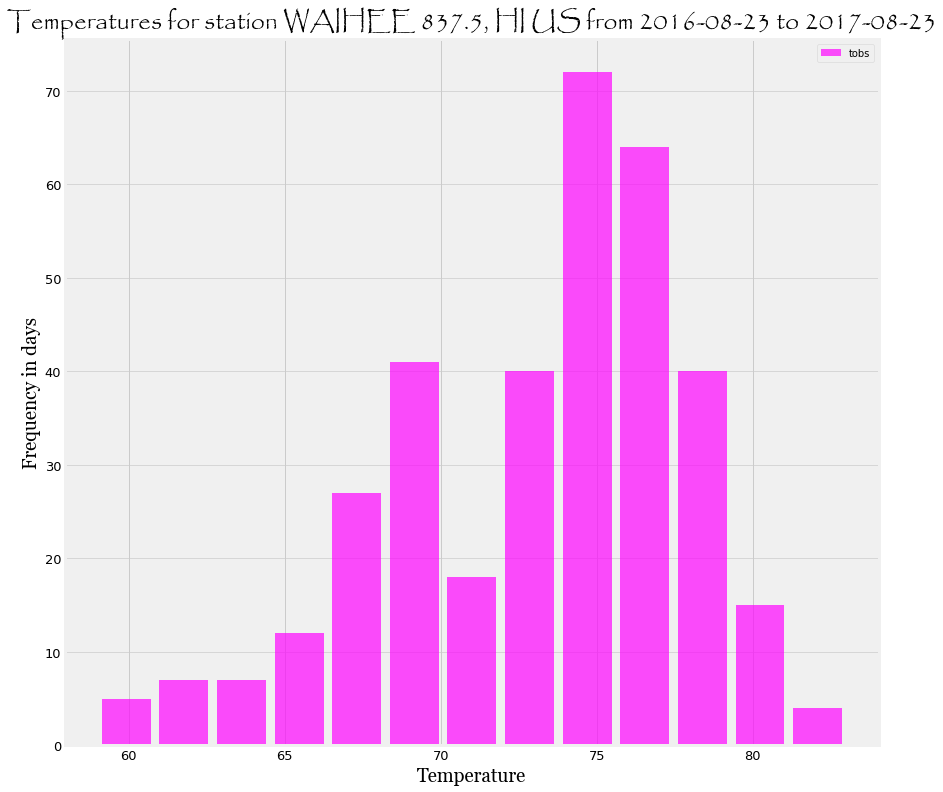

In [216]:
#plot the results as a histogram

fig, ax = plt.subplots(figsize=(13,13))
n, bins, patches = plt.hist(x=df2.tobs, bins=13, color='magenta',alpha=0.69, rwidth=0.85)
plt.grid(axis='y', alpha=0.69)
plt.xlabel('Temperature',font='Georgia',fontsize='19')
plt.ylabel('Frequency in days',font='Georgia',fontsize='19')
plt.title(f'Temperatures for station {sdf.name[0]} from {py_date} to {last20}',font='Papyrus',fontsize='25')
plt.legend(['tobs'], loc = 'upper right')
plt.yticks(size=13)
plt.xticks(size=13)
#plt.savefig("./Images/topstationhist.png")
plt.show()

In [213]:
sdf.name[0]

'WAIHEE 837.5, HI US'

# Close session

In [ ]:
# Close Session
session.close()